### 사용할 라이브러리

In [1]:
### 데이터 조작
import pandas as pd

### 데이터 시각화
import matplotlib.pyplot as plt

### 날짜 데이터를 처리하기 위한 라이브러리
from datetime import datetime

### 시계열분석 모델
# - 사전 설치 필요: pip install statsmodels
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
"""
<시계열 분석>
 - 사용 모델: ARIMA 모델 사용
  -> 이외, SARIMA 모델, LSTM 모델, XGBoost 등이 있음
 - 주로 시계열 분석에서는 ARIMA 모델을 사용하고 있음
 
<사용 할 데이터셋>
 - 년월별 항공기 탑승객 수 데이터 사용
 
<시계열 예측>
 - 년월별 데이터를 이용하여 훈련 후 > 향후 년 월에 대한 예측 진행
"""

In [2]:
### 데이터셋: github에서 제공하는 데이터 사용
# - 1949~1960년까지의 년월별 항공기 탑승객 수 데이터 제공
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"

### csv함수로 읽어들이기
# 데이터프레임 변수명: data
data = pd.read_csv(url)
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


### 데이터 전처리

In [3]:
### 년월(Month) 컬럼의 타입을 날짜 타입으로 변경하기
data['Month'] = pd.to_datetime(data['Month'])
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [4]:
### 날짜 타입(Month)의 데이터를 인덱스로 변환하기
data.set_index("Month", inplace=True)
data.info()
data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


### 년월별 탑승객 수 추이 시각화

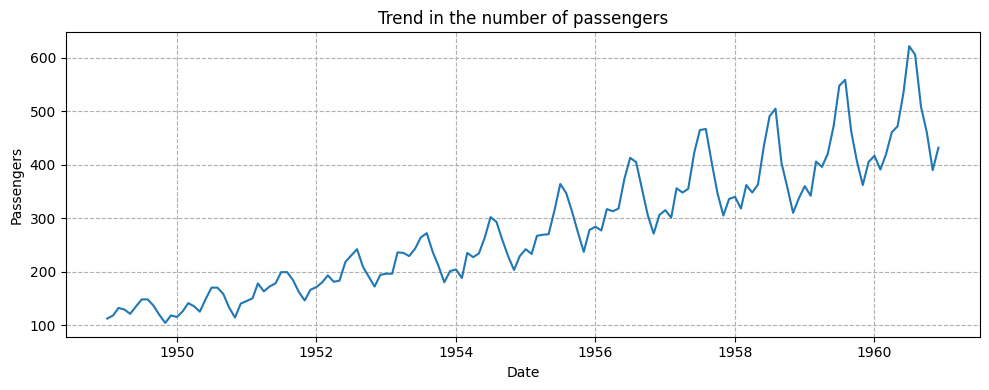

In [10]:
### matplotlib 라이브러리 이용하여 선그래프 그리기(추기 시각화)
plt.figure(figsize=(10, 4))
plt.title("Trend in the number of passengers")
plt.plot(data)
plt.xlabel('Date')
plt.ylabel("Passengers")
plt.grid(linestyle="--")
plt.tight_layout()
plt.show()

### 훈련 및 테스트 데이터로 분리하기

In [14]:
### 훈련 데이터 : 1949~1959년 데이터 사용
train = data[ : "1959"]
### 테스트 데이터 : 1960년 데이터 사용
test = data["1960" : ]

print(train)
print(test)

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1959-08-01         559
1959-09-01         463
1959-10-01         407
1959-11-01         362
1959-12-01         405

[132 rows x 1 columns]
            Passengers
Month                 
1960-01-01         417
1960-02-01         391
1960-03-01         419
1960-04-01         461
1960-05-01         472
1960-06-01         535
1960-07-01         622
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432


### 모델 학습하기

In [17]:
### ARIMA 모델 생성
# - 훈련데이터 사용
# - order = (p, d, q) = (자기회귀값, 차분값, 이동평균값)
# - p, d,q의 값은 다음에 개념 설명(시계열 전처리 영역)
# 시계열 분석에서 독립변수=시간데이터(인덱스), 종속변수=일반데이터(탑승객수)
train = train.asfreq('MS')
model = ARIMA(train, order=(2, 1, 2))

In [18]:
### 모델 훈련 시키기
model_fit = model.fit()
model_fit

### 예측하기

In [20]:
### 향후 12개월(1960년) 데이터로 예측하기
# - 시계열분석에서 예측은 forecare라고 칭합니다
forecast = model_fit.forecast(steps=12)

In [21]:
forecast

1960-01-01    411.312453
1960-02-01    430.812660
1960-03-01    457.433604
1960-04-01    483.661491
1960-05-01    502.616753
1960-06-01    509.821046
1960-07-01    504.207053
1960-08-01    488.158646
1960-09-01    466.639307
1960-10-01    445.702753
1960-11-01    430.821634
1960-12-01    425.487307
Freq: MS, Name: predicted_mean, dtype: float64

### 예측 결과 시각화하기(선그래프)

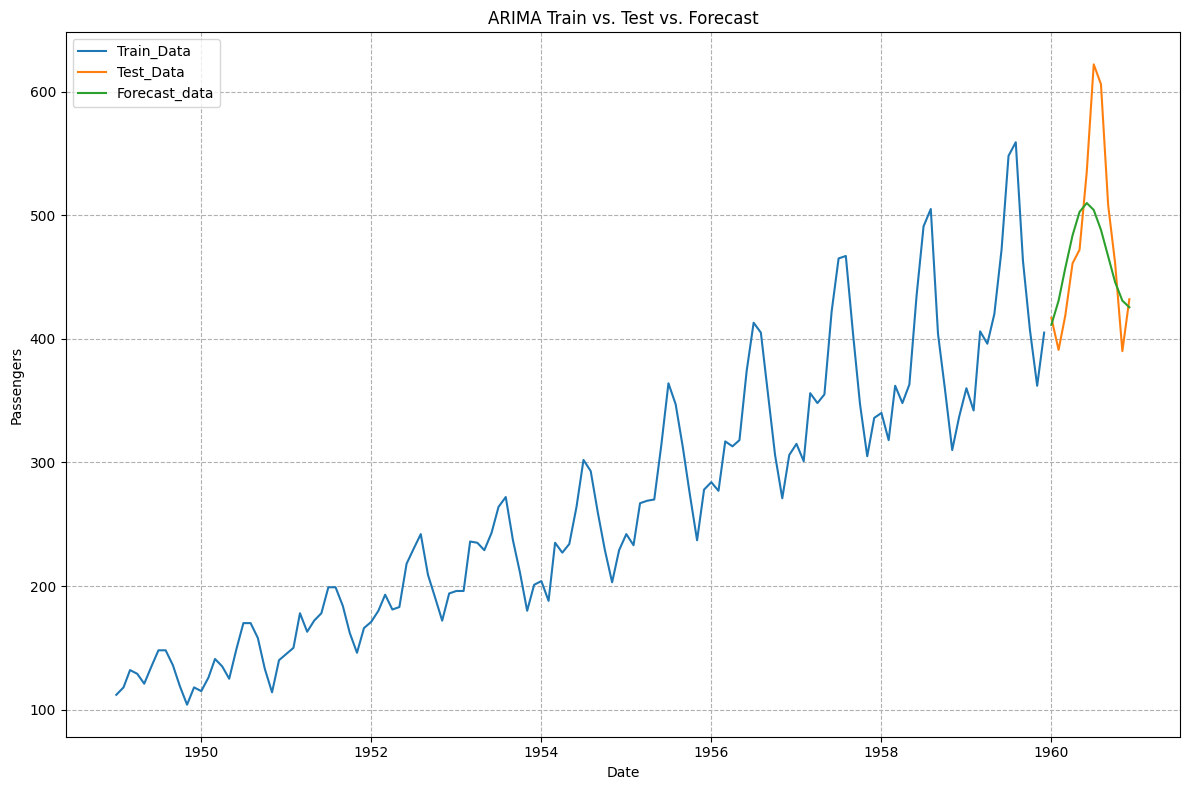

In [27]:
### 훈련 실제값, 테스트 실제값, 예측값 각 3개의 선 그래프를 하나의 그래프에 표현하기
plt.figure(figsize=(12, 8))
plt.title("ARIMA Train vs. Test vs. Forecast")
plt.plot(train, label="Train_Data")
plt.plot(test, label="Test_Data")
plt.plot(forecast, label="Forecast_data")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.grid(linestyle="--")
plt.tight_layout()
plt.show()